# Comparing the performance of three variants of gradient descent
## Batch, stochastic and mini-batch gradient descent in a backpropogation algorithm for training a multi-layer feedforward nueral network


### citations:

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
https://adventuresinmachinelearning.com/stochastic-gradient-descent/

https://towardsdatascience.com/stochastic-gradient-descent-explanation-and-complete-implementation-from-scratch-a2c6a02f28bd

https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307

https://youtu.be/i62czvwDlsw

## Batch gradient descent

(1.5, 4.9)

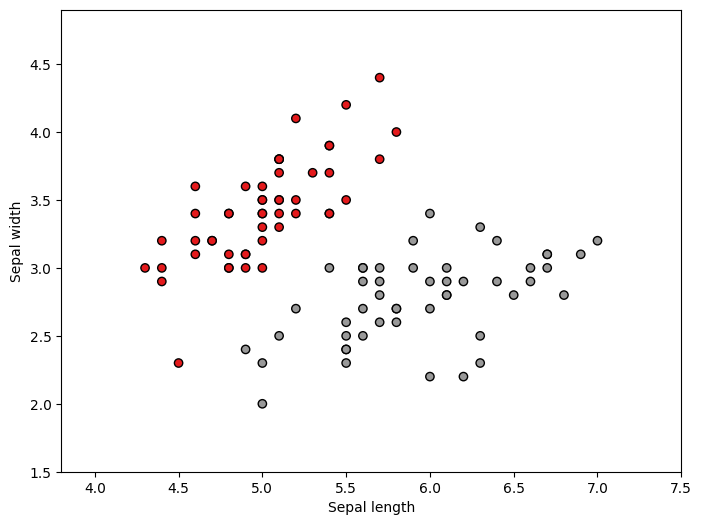

In [164]:
# Load data
iris = load_iris()
X=iris.data[0:99,:2]
y=iris.target[0:99]
# Plot the training points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [165]:
# Function for batch gradient decent    
def Batch_GD (Learning_Rate,num_iterations,X,y):
    #Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting Loop
    for i in range(num_iterations):
        #Step 2: Apply Sigmoid Function and get y prediction
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        #Step 3: Calculate Loss Function
        cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        
        #Step 4: Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-y).T)
        db=1/N*np.sum(y_pred-y)
        
        #Step 5: Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(cost)
            #print(cost)
    return(w,b,costs)# Run a function
Result_BatchGD=Batch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y)
print(Result_BatchGD)

(array([[ 6.01038124],
       [-9.42719952]]), -3.369525894516485, [0.6931471805599454, 0.3478716362841821, 0.2417539651400085, 0.19194229570230936, 0.16291980320624222, 0.14380614589560353, 0.13019735106252764, 0.11997268190004685, 0.1119831277573591, 0.10555080414937819, 0.10024916156959685, 0.09579591427990404, 0.09199651615812203, 0.08871234704500204, 0.08584184567525317, 0.08330882281668942, 0.08105495066985137, 0.07903478152273853, 0.07721235238801323, 0.0755588146678394, 0.07405074411632553, 0.07266891303627199, 0.0713973831888225, 0.07022282544151101, 0.06913400245457502, 0.0681213704156397, 0.06717676892645072, 0.06629317700433245, 0.06546451925621502, 0.06468551054159836, 0.06395153045853488, 0.06325852115327883, 0.06260290352868933, 0.06198150808356907, 0.061391517474457605, 0.060830418535883925, 0.06029596198288384, 0.05978612839199044, 0.05929909934350978, 0.05883323283015834, 0.05838704221074988, 0.057959178124143404, 0.05754841288672609, 0.057153626982750574, 0.056773797

## Mini Batch gradient descent

In [166]:
# Function for mini batch Gradient Descent
def Minibatch_GD (Learning_Rate,num_iterations,X,y,Minibatch):
    # Part 1: Mini Batch 
    np.random.seed(1000)
    N=len(X)
    mini_batches=[]
    
    #Step 1: Shuffle (X,y)
    permutation=list(np.random.permutation(N))
    shuffled_X=X[permutation,:]
    shuffled_y=y[permutation]
    
    #Step 2: Partition
    num_complete_minibatches=int(np.floor(N/Minibatch))
    
    for i in range(num_complete_minibatches):
        mini_batch_X=shuffled_X[i*Minibatch:(i+1)*Minibatch,:]
        mini_batch_y=shuffled_y[i*Minibatch:(i+1)*Minibatch]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    if N % Minibatch !=0:
        mini_batch_X=shuffled_X[N-Minibatch:N,:]
        mini_batch_y=shuffled_y[N-Minibatch:N]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # Part 2: Gradient Descent
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    
    for i in range(num_iterations):
        for j in range(num_complete_minibatches+1):
            #Select Minibatch
            XX=mini_batches[j][0]
            yy=mini_batches[j][1]
            #Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            
            #Step 3: Calculate Gradient
            dw=1/Minibatch*np.dot(XX.T,(y_pred-yy).T)
            db=1/Minibatch*np.sum(y_pred-yy)
            #Step 4: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 5: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        
        if i % 1000 ==0:
            costs.append(cost)
            #print(cost)
            
    return(w,b,costs)# Run a function
Result_MiniGD=Minibatch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y,Minibatch=50)
print(Result_MiniGD)

(array([[  7.07024305],
       [-10.46482817]]), -5.862588193986868, [0.691622450268515, 0.24237913006120332, 0.16319302905964767, 0.13027273302255934, 0.11193879928571476, 0.10012576097946974, 0.0918175458434173, 0.08562206003552768, 0.08080419608809888, 0.07693751263523896, 0.0737568096679595, 0.07108807844314514, 0.06881217344178268, 0.06684463350339105, 0.0651238344544098, 0.06360370786117925, 0.06224909090464575, 0.061032657846182635, 0.05993283721000971, 0.05893236283924839, 0.05801724387816049, 0.05717601838541393, 0.05639920314100122, 0.055678881793988465, 0.055008392257240454, 0.05438208642447152, 0.053795143343723234, 0.05324342241891828, 0.0527233469432215, 0.052231810869865405, 0.05176610356635198, 0.05132384861689184, 0.050902953694926936, 0.05050156922991041, 0.05011805411343236, 0.04975094708001067, 0.049398942692888845, 0.04906087109019531, 0.048735680819824094, 0.04842242422544641, 0.04812024495068079, 0.047828367210658106, 0.04754608654523705, 0.04727276181986119, 0.0

## Stochastic gradient descent

In [167]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
iris = load_iris()

In [168]:
ir = pd.DataFrame(iris['data'])
ir['Species'] = pd.DataFrame(iris['target'])
ir

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [180]:
#seperate dataset as training set and test set. 
#before doign this, the features and target have to be seperated

# ir_features = ir.drop(columns = 'Species')
# ir_label = ir['Species']

# x_train, x_test, y_train, y_test = train_test_split(
#     ir_features, ir_label, 
#     test_size = 0.2,
#     random_state = 10
# )

In [181]:
x_train['Species'] = y_train
df = x_train

In [172]:
def stratified_spl(df):
    df1 = df[df['Species'] == 1]
    df0 = df[df['Species'] == 0]
    df1_spl = df1.sample(n=4)
    df0_spl = df0.sample(n=8)
    return pd.concat([df1_spl, df0_spl])


def hypothesis(X, w):
    z = np.dot(w, X.T)
    return 1/(1+np.exp(-(z)))

In [173]:
def xy(df):
    df_features = df.drop(columns = 'Species')
    df_label = df['Species']
    df_features['00'] = [1]*12
    return df_features, df_label

In [174]:
def error(X, y, w):
    n = len(X)
    yp = hypothesis(X, w)
    return np.sum((yp-y)**2)/n

In [175]:
def grad_des(df, w, alpha, epoch):
    j = []
    w1 = []
    w1.append(w)
    for i in range(epoch):
        d = stratified_spl(df)
        X, y = xy(d)
        n= len(X)
        yp = hypothesis(X, w)
        
        for i in range(4):
            w[i] -= (alpha/n) * np.sum(-2*X[i]*(y-yp))
        w[4] -= (alpha/n) *np.sum(-2*(y-yp))
        w1.append(list(w))
        j.append(error(X, y, w))
    return j, w1

In [176]:
w = np.random.rand(5)
w

array([0.32187262, 0.55964081, 0.86534558, 0.84728288, 0.10781717])

In [182]:
j, w1 = grad_des(x_train, w, 0.01, 100)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
def err_test(X, y, w):
    er = []
    for i in range(len(w1)):
        er.append(error(X, y, w[i]))
    return er

In [ ]:
def plot(X, y, w):
    error = err_test(X, y, w)
    return plt.scatter(range(len(error)), error)

In [ ]:
X = x_train.drop(columns = 'Species')
X['00'] = [1]*len(X)

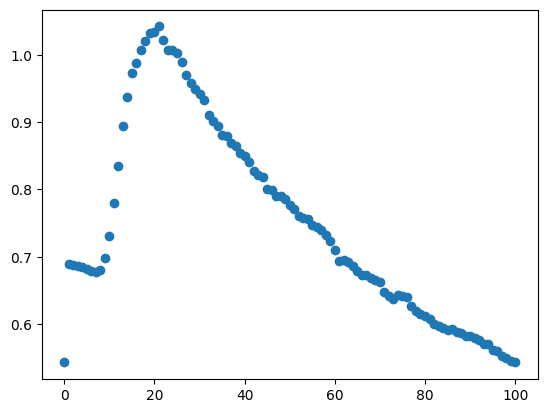

In [ ]:
import matplotlib.pyplot as plt
plot(X, y_train, w1)

In [ ]:
X_t=x_test
X_t['00'] = [1]*len(x_test)

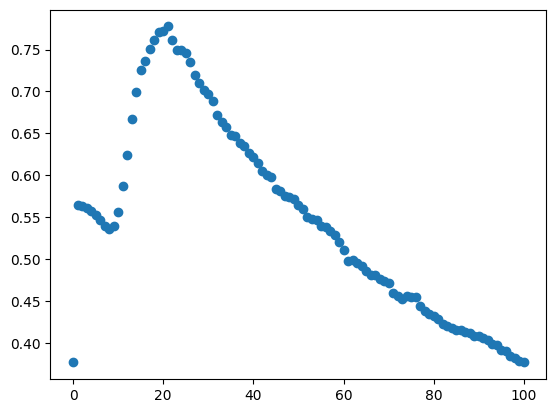

In [ ]:
plot(X_t, y_test, w1)

In [ ]:
def accuracy(X, y, w):
    yp = hypothesis(X, w)
    for i in range(len(yp)):
        if yp[i] >=0.5:
            yp[i] = 1
        else:
            yp[i] = 0
    return sum(yp == y)/len(y)

In [ ]:
def accuracy_series(X, y, w1):
    acc = []
    for i in range(len(w1)):
        acc.append(accuracy(X, y, w1[i]))  
    return acc

In [ ]:
np.array(accuracy_series(X, y_train, w1))

array([0.64166667, 0.30833333, 0.30833333, 0.30833333, 0.30833333,
       0.30833333, 0.30833333, 0.30833333, 0.30833333, 0.30833333,
       0.30833333, 0.30833333, 0.30833333, 0.29166667, 0.20833333,
       0.225     , 0.26666667, 0.325     , 0.35833333, 0.35      ,
       0.34166667, 0.34166667, 0.35      , 0.35      , 0.35      ,
       0.35      , 0.35      , 0.35833333, 0.35833333, 0.36666667,
       0.36666667, 0.36666667, 0.38333333, 0.4       , 0.40833333,
       0.41666667, 0.41666667, 0.43333333, 0.43333333, 0.45      ,
       0.45      , 0.45      , 0.45833333, 0.45833333, 0.45833333,
       0.475     , 0.475     , 0.5       , 0.48333333, 0.49166667,
       0.51666667, 0.525     , 0.55833333, 0.55833333, 0.55      ,
       0.55833333, 0.55833333, 0.55833333, 0.56666667, 0.575     ,
       0.6       , 0.625     , 0.6       , 0.60833333, 0.61666667,
       0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
       0.63333333, 0.63333333, 0.63333333, 0.64166667, 0.63333

In [ ]:
np.array(accuracy_series(X_t, y_test, w1))

array([0.76666667, 0.43333333, 0.43333333, 0.43333333, 0.43333333,
       0.43333333, 0.43333333, 0.43333333, 0.43333333, 0.43333333,
       0.43333333, 0.43333333, 0.43333333, 0.36666667, 0.33333333,
       0.4       , 0.36666667, 0.4       , 0.4       , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.36666667, 0.36666667,
       0.36666667, 0.36666667, 0.4       , 0.4       , 0.4       ,
       0.4       , 0.46666667, 0.5       , 0.5       , 0.5       ,
       0.56666667, 0.56666667, 0.56666667, 0.56666667, 0.56666667,
       0.6       , 0.63333333, 0.63333333, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.7       , 0.73333333, 0.76666667,
       0.76666667, 0.76666667, 0.76666667, 0.76666667, 0.76666667,
       0.76666667, 0.76666667, 0.76666667, 0.76666667, 0.76666667,
       0.76666667, 0.76666667, 0.76666667, 0.76666667, 0.76666